In [1]:
# 利用朴素贝叶斯进行多变量时序预测欺骗干扰

# 导入库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# 导入数据集
#dataset = pd.read_csv('./data/SMOTE数据拆分/随机过采样+随机欠采样.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/随机欠采样.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/ADASYN.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/SMOTE.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/SMOTE+随机欠采样.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/Borderline-SMOTE.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/Borderline-SMOTE SVM.csv')
dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/9在第一位.csv')

In [3]:
# 查看数据集的前5个值
dataset.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,157.0,2.5,11.0,2176.0,438825400.0,6287.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.1,3145920.0,-3.46,2.11,0.0,0.0,1
1,161.0,1.0,31.0,2190.0,289780800.0,1422.4,0.0,50.0,29.0,24.7,...,1.0,64.0,0.0,181.0,3145920.0,1.50,-1.53,0.0,0.0,0
2,37.0,1.0,31.0,2190.0,289912800.0,1554.4,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,181.2,3145920.0,2.33,-1.54,0.0,0.0,0
3,170.0,2.5,11.0,2176.0,438838400.0,6300.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,8.5,3145920.0,-3.50,2.47,0.0,0.0,1
4,124.0,1.0,31.0,2190.0,289743600.0,1385.2,0.0,50.0,29.0,24.9,...,1.0,64.0,0.0,178.3,3145920.0,2.43,-1.39,0.0,0.0,0


In [4]:
dataset.shape

(13828, 65)

In [5]:
# 数据集打乱顺序
from sklearn.utils import shuffle  
dataset = shuffle(dataset) 
dataset.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
7842,191.638403,2.500000,10.000000,2176.0,4.385374e+08,5999.838403,0.000000,16.0,38.0,24.8,...,1.0,64.0,0.0,-10.563840,3145920.0,-0.471696,1.840848,0.0,0.0,1
613,179.791830,2.500000,11.000000,2176.0,4.388482e+08,6310.591830,0.000000,16.0,41.0,24.7,...,1.0,64.0,0.0,8.200000,3145920.0,-5.737588,2.538696,0.0,0.0,1
6373,188.000000,2.500000,6.000000,2176.0,4.388564e+08,6318.800000,0.000000,16.0,42.0,24.7,...,1.0,64.0,0.0,8.500000,3145920.0,-0.470000,-4.280000,0.0,0.0,1
13231,175.847641,4.619103,10.238206,2176.0,4.394870e+08,395.847641,11.019336,16.0,46.0,24.7,...,1.0,64.0,0.0,28.784764,3145920.0,6.096481,-0.944137,0.0,0.0,1
13331,84.647396,2.500000,8.000000,2176.0,4.383960e+08,5858.447396,0.000000,16.0,35.0,24.8,...,1.0,64.0,0.0,-21.200000,3145920.0,-0.801734,2.361328,0.0,0.0,1


In [6]:
# 将数据集拆分为独立变量和因变量
X = dataset[dataset.columns[:-1]]   #从0到倒数第一列
y = dataset.Jammer                  #只包括data的y这一列

In [7]:
# 查看数据集的形状
from sklearn.decomposition import PCA

array = dataset.values
print(array.shape)

(13828, 65)


In [8]:
# 将数据集分割为训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 34)

In [9]:
# 特性缩放，使变量在单个缩放
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)

(9679, 64)


In [10]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=64)


#数据的标准化
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)#各个成分方差值
print(sum(var_ratio))#成分方差总和

[[ 0.50948064 -0.17274299  1.20555111 ... -1.97568587  0.
   0.        ]
 [ 0.85532136 -0.09685492 -1.06567046 ...  0.64720527  0.
   0.        ]
 [-1.5507417  -0.09685492 -1.26316798 ... -0.12315403  0.
   0.        ]
 ...
 [ 0.66056361 -0.09685492 -0.17693158 ... -1.46556841  0.
   0.        ]
 [-0.09485125 -0.17274299  1.00805358 ... -0.36180548  0.
   0.        ]
 [ 1.10007771  0.0296252  -0.07818282 ...  2.379703    0.
   0.        ]]
[2.33077125e+01 3.17379352e+00 3.00102982e+00 2.46239991e+00
 2.10269971e+00 1.93019095e+00 1.70753171e+00 1.56250806e+00
 1.50675934e+00 1.36275690e+00 1.17558181e+00 1.09014459e+00
 1.07595458e+00 1.01191655e+00 9.95323123e-01 8.81762775e-01
 8.60476419e-01 8.07334369e-01 7.40367344e-01 6.71331954e-01
 6.15584787e-01 5.77503095e-01 5.16995254e-01 4.67763421e-01
 4.63313432e-01 4.01704311e-01 3.87237696e-01 3.72305871e-01
 3.41812396e-01 3.26812380e-01 3.08989013e-01 2.77419345e-01
 2.67669689e-01 2.47330656e-01 2.31132675e-01 1.64525941e-01
 1.4447

In [11]:
##可视化方差比例
#fig2 = plt.figure(figsize=(10,5))
#plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14],var_ratio)
#plt.xlabel('Components')
#plt.ylabel('Variance ratio')
#plt.show()

(9679, 25) (9679, 64)
[0.40181559 0.05471492 0.05173655 0.04245078 0.0362497  0.03327572
 0.02943716 0.02693701 0.02597593 0.02349338 0.02026656 0.01879365
 0.01854902 0.01744503 0.01715896 0.01520123 0.01483427 0.01391809
 0.01276363 0.01157348 0.0106121  0.00995551 0.00891187 0.00806383
 0.00798681]
<class 'numpy.ndarray'>
0.9320999999999999


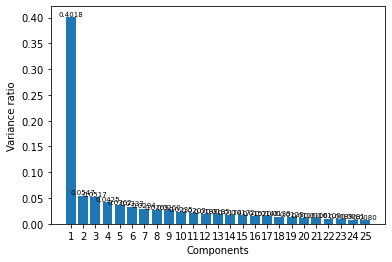

In [12]:
# 训练集数据降维到25维
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape,X_norm.shape)

# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 26))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
                                   "16","17","18","19","20","21","22","23","24","25"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

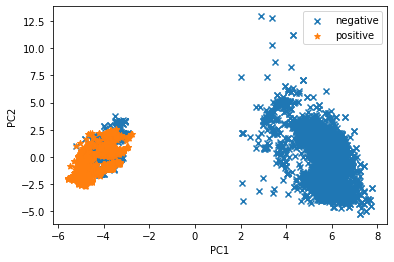

In [13]:
#降维数据的可视化
fig3 = plt.figure()
plt.scatter(X_train_pca[:,0][y_train==0],X_train_pca[:,1][y_train==0],marker='x',label='negative')
plt.scatter(X_train_pca[:,0][y_train==1],X_train_pca[:,1][y_train==1],marker='*',label='positive')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [14]:
# 降维后的模型建立与训练
from sklearn.naive_bayes import GaussianNB

PCA_NB = GaussianNB()
PCA_NB.fit(X_train_pca,y_train)

GaussianNB()

In [15]:
#data = pd.read_csv('.\data\K=10\K=5.csv')
##data = pd.read_csv('.\data\GENEGPS64ALLAll.csv')

##将数据集拆分为独立变量和因变量
#X_test = data[data.columns[:-1]]   #从0到倒数第一列
#y_test = data.Jammer                  #只包括data的y这一列
##print(X_test)

In [16]:
#测试集数据降维到25维
pca = PCA(n_components=25)

X_norm = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_norm)
#X_test_pca = pca.fit_transform(X_test)

print(X_test_pca)
print(X_test_pca.shape)

[[ 5.39091488  0.56167714  1.16500355 ... -0.75741985 -0.68408853
  -0.23906093]
 [-4.61807802 -0.23179024  1.65720781 ...  0.4178001   0.21658587
  -0.96055651]
 [-5.1178416  -2.61416875  1.04312026 ... -0.2344396   0.73267823
  -0.66557505]
 ...
 [ 6.48589951  1.24577717  0.95868845 ... -1.19318068  2.25047039
  -0.45909906]
 [-3.7360563   1.39271575 -0.59164686 ...  0.44259336 -0.2812401
   0.09036604]
 [ 5.55570955  3.35655795  1.56690382 ...  0.40003136 -1.32762773
   0.11139515]]
(4149, 25)


In [17]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict_pca = PCA_NB.predict(X_test_pca)
print(y_predict_pca)
print(y_predict_pca.shape)
accuracy_pca = accuracy_score(y_test,y_predict_pca)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(y_test,y_predict_pca)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(y_test,y_predict_pca)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(y_test,y_predict_pca)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

[0 1 1 ... 0 1 0]
(4149,)
PCA测试集准确率: 0.9207


PCA测试集精确率: 0.9307


PCA测试集召回率: 0.9097


PCA测试集F1值: 0.9200


In [18]:
#制作PCA混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_pca)
print(cm)

[[1927  141]
 [ 188 1893]]


In [19]:
#从混淆矩阵中寻找准确性。
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('正确预测值的数量: ', corrPred)
print('错误预测值的数量: ', falsePred)
#print ('\n\n朴素贝叶斯分类器的准确率为: ', corrPred/(cm.sum()))

正确预测值的数量:  3820
错误预测值的数量:  329


In [20]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test, y_predict_pca,digits=4))

              precision    recall  f1-score   support

           0     0.9111    0.9318    0.9213      2068
           1     0.9307    0.9097    0.9200      2081

    accuracy                         0.9207      4149
   macro avg     0.9209    0.9207    0.9207      4149
weighted avg     0.9209    0.9207    0.9207      4149



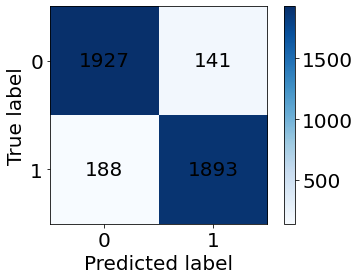

In [21]:
classes = list(set(y))
classes.sort()
confusion = confusion_matrix(y_predict_pca, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes, fontsize=20)
plt.yticks(indices, classes, fontsize=20)
plt.colorbar().ax.tick_params(labelsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],
                 va='center', ha='center',fontsize=20, )

plt.show()

In [22]:
# K折交叉验证模块 
from sklearn.model_selection import cross_val_score 
#使用K折交叉验证模块  
#scores = cross_val_score(nvclassifier, X_test, y_test, cv=10, scoring='accuracy')  
scores = cross_val_score(PCA_NB, X_test_pca, y_test, cv=10,scoring='accuracy')  

scores = np.around(scores,decimals=4)

#将10次的预测准确率打印出  
print('10折交叉验证准确率：',scores)  
# [0.92 1.   0.83 0.88 0.91 0.96 1.   1.   0.78 0.74]
#将10次的预测准确平均率打印出0.901630434782608  

scoresmean = np.around(scores.mean(),decimals=4)

print('\n\n10折交叉验证平均准确率：',scoresmean)

10折交叉验证准确率： [0.9325 0.9325 0.9373 0.947  0.9373 0.9229 0.9373 0.9108 0.9349 0.9179]


10折交叉验证平均准确率： 0.931


In [23]:
X_test_pca.shape, y_test.shape

((4149, 25), (4149,))

In [24]:
precision = cross_val_score(PCA_NB, X_test_pca, y_test, cv=10,scoring='precision') 

precision = np.around(precision,decimals=4)

print('10折交叉验证精确率：',precision)

precisionmean = np.around(precision.mean(),decimals=4)

print('\n\n10折交叉验证平均精确率：',precisionmean)

10折交叉验证精确率： [0.8913 0.9018 0.8991 0.9266 0.9136 0.8894 0.9027 0.8767 0.9099 0.875 ]


10折交叉验证平均精确率： 0.8986


In [25]:
recall = cross_val_score(PCA_NB, X_test_pca, y_test, cv=10,scoring='recall') 

recall = np.around(recall,decimals=4)

print('10折交叉验证精确率：',recall)

recallmean = np.around(recall.mean(),decimals=4)

print('\n\n10折交叉验证平均召回率：',recallmean)

10折交叉验证精确率： [0.9856 0.9712 0.9856 0.9712 0.9663 0.9663 0.9808 0.9567 0.9665 0.976 ]


10折交叉验证平均召回率： 0.9726


In [26]:
f1 = cross_val_score(PCA_NB, X_test_pca, y_test, cv=10,scoring='f1') 

f1 = np.around(f1,decimals=4)

print('10折交叉验证f1值：',f1)

f1mean = np.around(f1.mean(),decimals=4)

print('\n\n10折交叉验证平均f1值：',f1mean)

10折交叉验证f1值： [0.9361 0.9352 0.9404 0.9484 0.9393 0.9263 0.9401 0.9149 0.9374 0.9227]


10折交叉验证平均f1值： 0.9341


In [27]:
roc_auc = cross_val_score(PCA_NB,  X_test_pca, y_test, cv=10,scoring='roc_auc') 

roc_auc = np.around(roc_auc,decimals=4)

print('10折交叉验证roc_auc值：',roc_auc)

roc_auc = np.around(roc_auc.mean(),decimals=4)

print('\n\n10折交叉验证平均ROC_AUC值：',roc_auc.mean())

10折交叉验证roc_auc值： [0.9812 0.985  0.9764 0.9902 0.9825 0.9836 0.9867 0.9799 0.9886 0.9722]


10折交叉验证平均ROC_AUC值： 0.9826


[0 1]


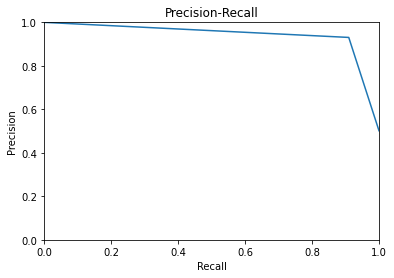

In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, y_predict_pca) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()